# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [5]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [6]:
# !pip install numpy==1.26.4 pandas==2.2.2 seaborn==0.13.2 matplotlib==3.10.0 Pillow==11.1.0 tensorflow==2.18.0 keras==3.8.0 scikit-learn==1.6.1

In [54]:
# Import essential libraries

# For Data Manipulation
import numpy as np
import pandas as pd

# For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

# For Data Loading
import zipfile
import os

# For Data Preprocessing
from collections import Counter

# For Train-Test Split
from sklearn.model_selection import train_test_split

# For Encoding Categorical Labels
from tensorflow.keras.utils import to_categorical

# For model building
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# For Model Training
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# For Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Load the dataset.

In [8]:
# Load and unzip the dataset

# Download the dataset
zippath = "Dataset_Waste_Segregation/data.zip"
extract_path = "Dataset_Waste_Segregation/"

# Check if the zip file exists
if os.path.exists(zippath):
    # Unzip the dataset
    with zipfile.ZipFile(zippath, 'r') as zip_ref:
        if(os.path.exists(os.path.join(extract_path, "data"))):
            # Check if the directory already exists
            print(f"Directory {extract_path} already exists. Please remove it before extracting.")
            exit(1)
        else:
            zip_ref.extractall(extract_path)
    print(f"Dataset successfully extracted to {extract_path}")
else:
    print(f"Zip file not found at {zippath}. Please check the path.")

Directory Dataset_Waste_Segregation/ already exists. Please remove it before extracting.
Dataset successfully extracted to Dataset_Waste_Segregation/


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [9]:
# Create a function to load the raw images
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                img_path = os.path.join(label_folder, filename)
                if filename.endswith('.jpg') or filename.endswith('.png'):
                    img = Image.open(img_path)
                    img = img.resize((128, 128))  # Resize image to 128x128
                    images.append(np.array(img))
                    labels.append(label)
    return np.array(images), np.array(labels)

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [10]:
# Path to the main folder containing subfolders
data_path = os.path.join(extract_path, 'data')

In [11]:
# Get the images and their labels
images, labels = load_images_from_folder(data_path)
print(f"Loaded {len(images)} images with labels.")

Loaded 7625 images with labels.


In [12]:
# Check the number of images and labels
len(images), len(labels)

(7625, 7625)

In [13]:
categories = np.unique(labels)
print(f"Categories: {categories}")

Categories: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']


In [14]:
# Explore the dataset
for i, category in enumerate(categories):
    print(f"Category: {category}, Number of images: {np.sum(labels == category)}")

Category: Cardboard, Number of images: 540
Category: Food_Waste, Number of images: 1000
Category: Glass, Number of images: 750
Category: Metal, Number of images: 1000
Category: Other, Number of images: 1010
Category: Paper, Number of images: 1030
Category: Plastic, Number of images: 2295


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

C:\Users\kusha\AppData\Local\Temp\ipykernel_27484\1677317990.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette="inferno")


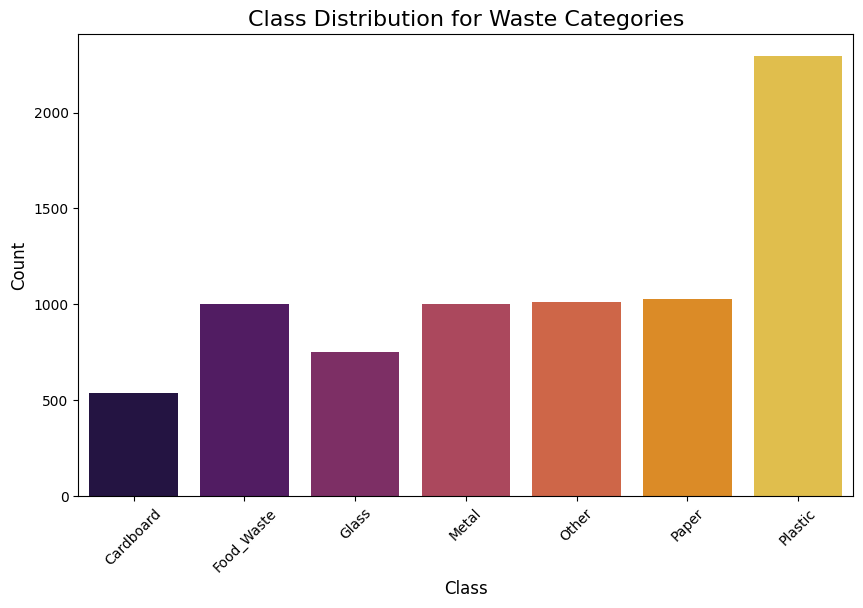

In [15]:
# Count the labels
label_counts = Counter(labels)

# Visualise Data Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette="inferno")
plt.title("Class Distribution for Waste Categories", fontsize=16)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

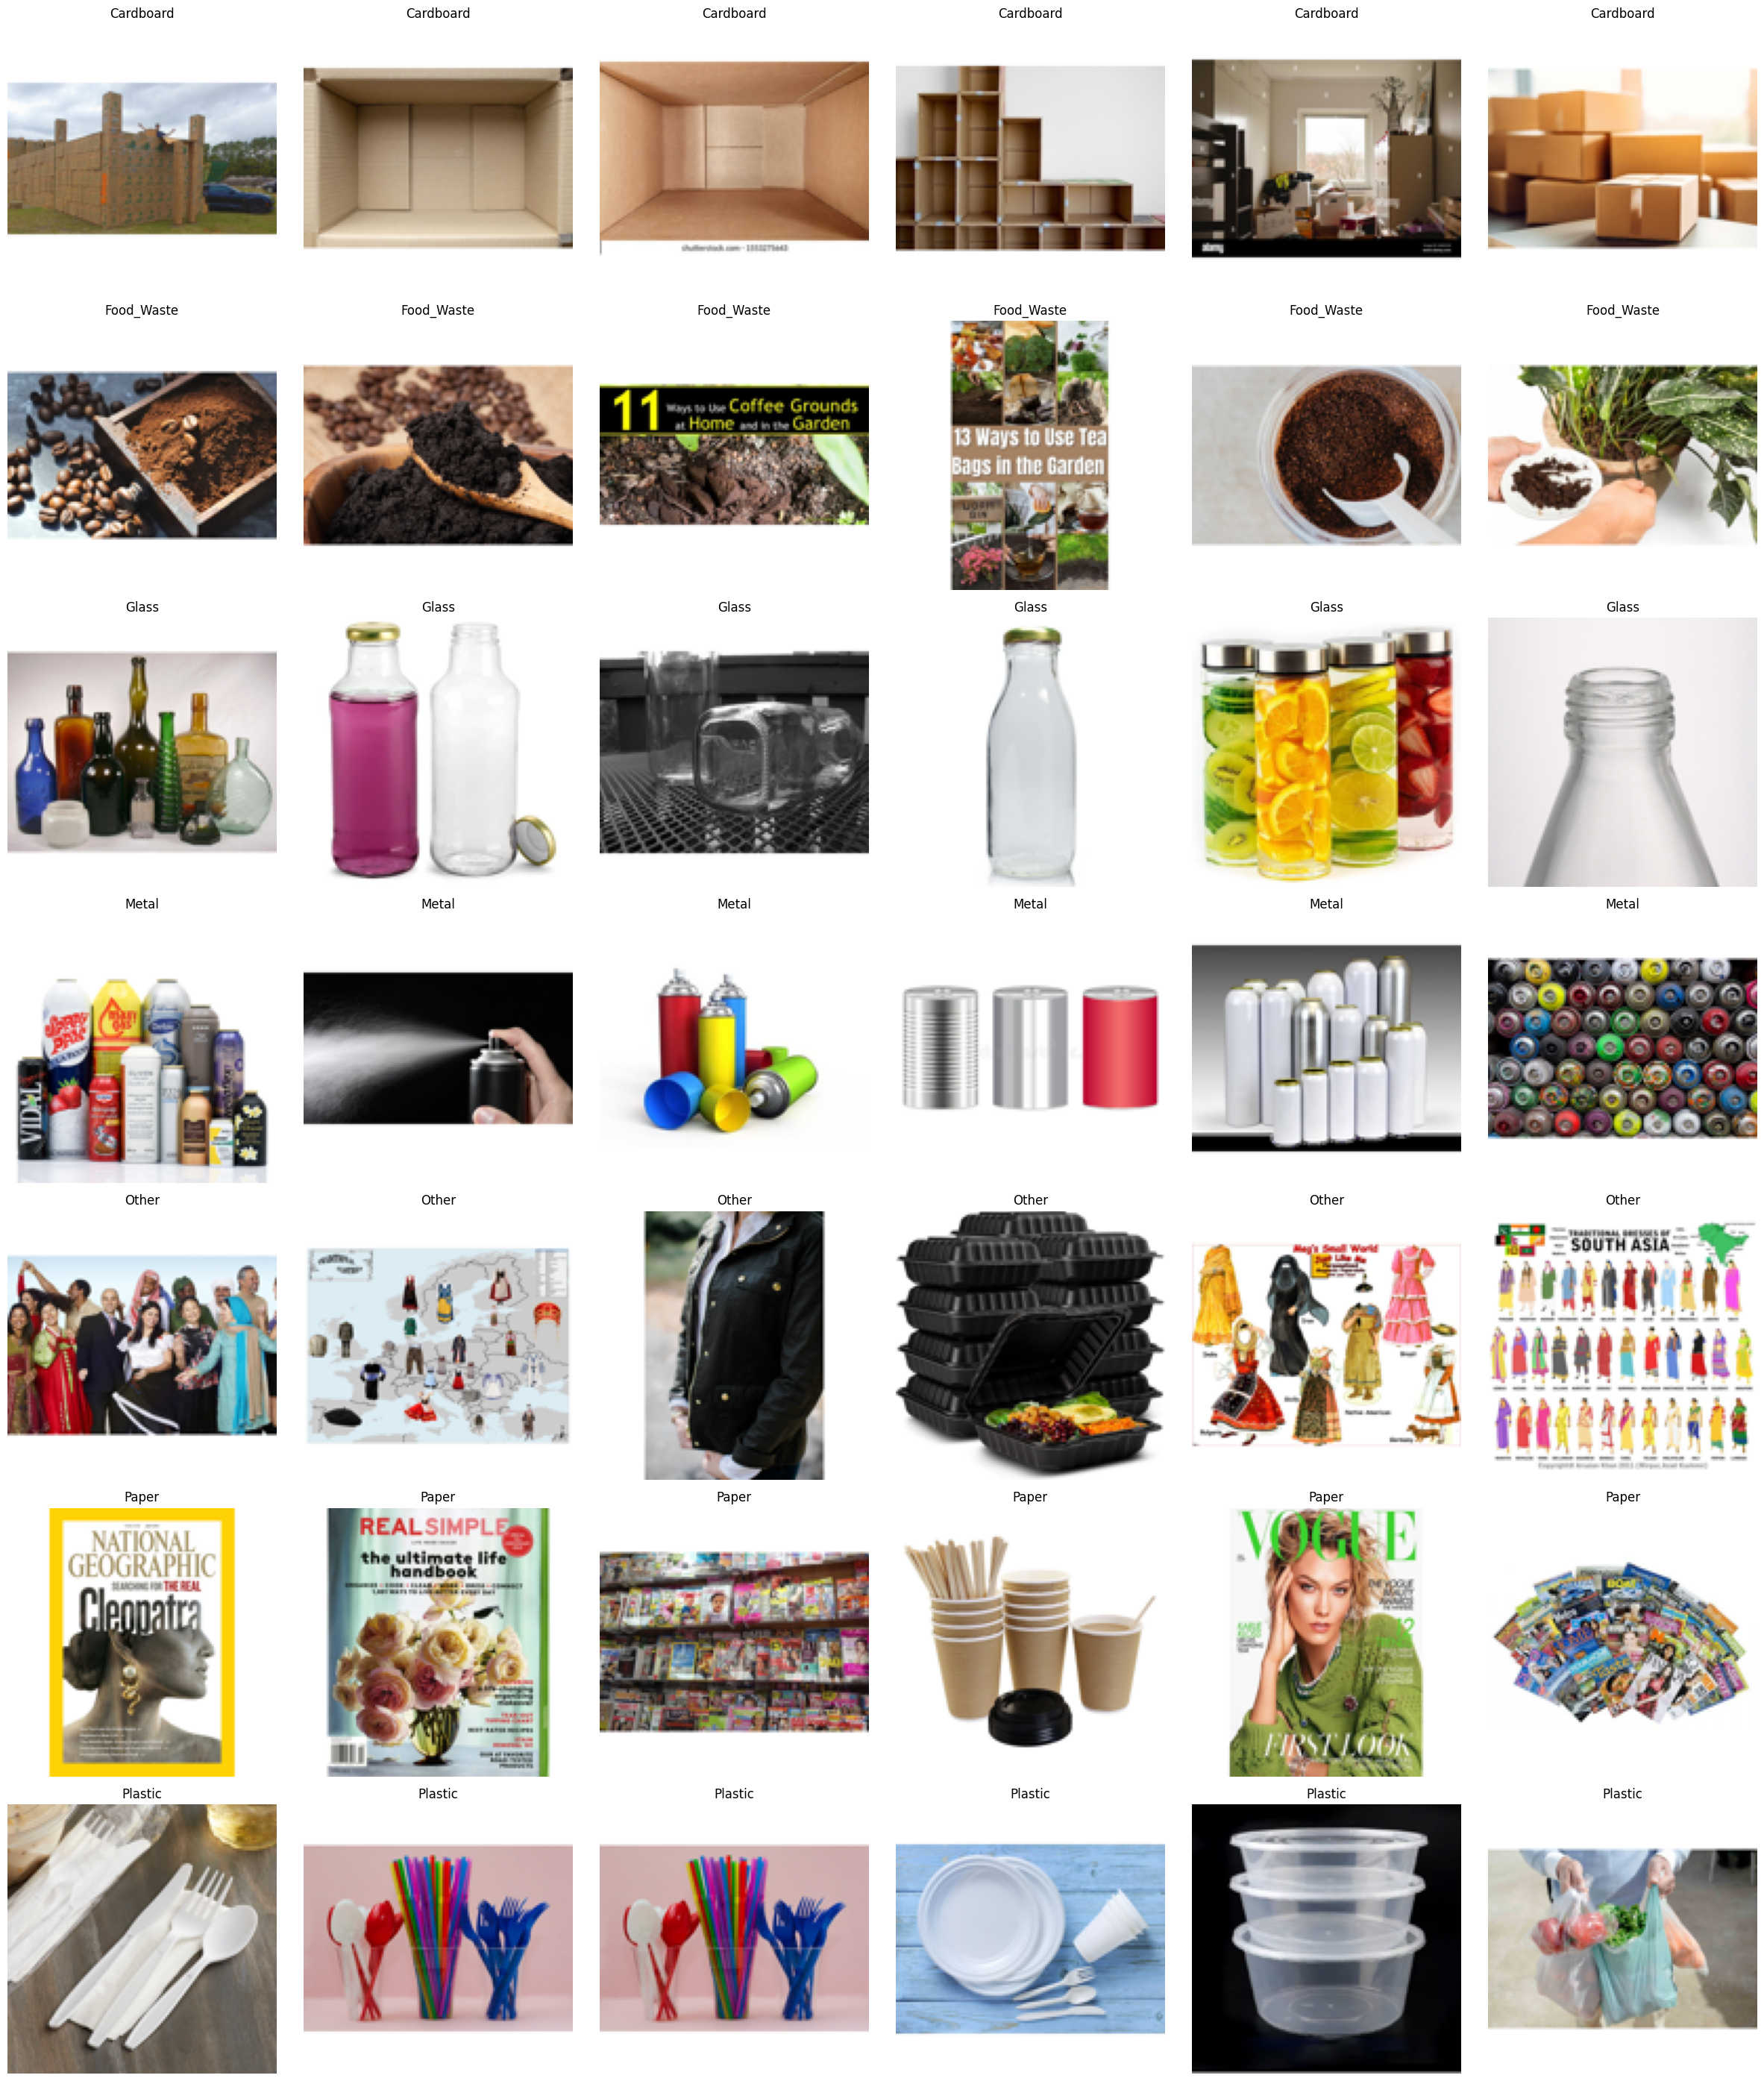

In [16]:
# Visualise Sample Images (across different labels)

# Number of images to display
num_images_to_display = 6

# Dictionary to store the images and labels
images_dict = {}

# Loop through each label and get the first few images
for category_folder in os.listdir(data_path):
    category_path = os.path.join(data_path, category_folder)
    if os.path.isdir(category_path):
        images_dict[category_folder] = []
        for filename in os.listdir(category_path):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                img_path = os.path.join(category_path, filename)
                img = Image.open(img_path)
                img = img.resize((128, 128))  # Resize image to 128x128
                images_dict[category_folder].append(np.array(img))
                if len(images_dict[category_folder]) >= num_images_to_display:
                    break

# Plot the images
plt.figure(figsize=(num_images_to_display * 4, len(images_dict) * 4))
for i, (label, imgs) in enumerate(images_dict.items()):
    for j, img in enumerate(imgs):
        plt.subplot(len(images_dict), num_images_to_display, i * num_images_to_display + j + 1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
plt.tight_layout()
plt.show()


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [17]:
# Find the smallest and largest image dimensions from the data set

# Function to find the smallest and largest image dimensions in the dataset
def find_image_dimensions(data_path):
    min_width, min_height = float('inf'), float('inf')
    max_width, max_height = 0, 0

    for category_folder in os.listdir(data_path):
        category_path = os.path.join(data_path, category_folder)
        if os.path.isdir(category_path):
            for filename in os.listdir(category_path):
                if filename.endswith('.jpg') or filename.endswith('.png'):
                    img_path = os.path.join(category_path, filename)
                    with Image.open(img_path) as img:
                        width, height = img.size
                        min_width, min_height = min(min_width, width), min(min_height, height)
                        max_width, max_height = max(max_width, width), max(max_height, height)

    return (min_width, min_height), (max_width, max_height)


In [18]:
# Call the function and print the results
min_dimensions, max_dimensions = find_image_dimensions(data_path)
print(f"Smallest dimensions: {min_dimensions}")
print(f"Largest dimensions: {max_dimensions}")

Smallest dimensions: (256, 256)
Largest dimensions: (256, 256)


In [19]:
# Resize the image dimensions

# Function to resize images to a fixed size
def resize_images(data_path, output_path, target_size=(128, 128)):
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    
    for category_folder in os.listdir(data_path):
        category_path = os.path.join(data_path, category_folder)
        output_category_path = os.path.join(output_path, category_folder)
        
        if os.path.isdir(category_path):
            if not os.path.exists(output_category_path):
                os.makedirs(output_category_path)
            
            for filename in os.listdir(category_path):
                if filename.endswith('.jpg') or filename.endswith('.png'):
                    img_path = os.path.join(category_path, filename)
                    output_img_path = os.path.join(output_category_path, filename)
                    
                    with Image.open(img_path) as img:
                        img_resized = img.resize(target_size)
                        img_resized.save(output_img_path)
    
    print(f"Images resized and saved to {output_path}")


In [20]:
# Call the function to resize images
output_path = os.path.join(extract_path, 'resized_data')
resize_images(data_path, output_path, target_size=(128, 128))

Images resized and saved to Dataset_Waste_Segregation/resized_data


In [21]:
# Get resized images and their labels
images, labels = load_images_from_folder(output_path)
print(f"Loaded {len(images)} images with labels.")

Loaded 7625 images with labels.


In [22]:
print(f"Resized images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

Resized images shape: (7625, 128, 128, 3)
Labels shape: (7625,)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

#### **2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [25]:
# Encode the labels suitably
unique_labels, encoded_labels = np.unique(labels, return_inverse=True)

# Convert to one-hot encoding
one_hot_labels = to_categorical(encoded_labels)

# Print the results
print("Unique Labels:", unique_labels)
print("Encoded Labels:", encoded_labels)
print("One-Hot Encoded Labels:\n", one_hot_labels)


Unique Labels: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']
Encoded Labels: [0 0 0 ... 6 6 6]
One-Hot Encoded Labels:
 [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [29]:
# Assign specified parts of the dataset to train and validation sets

X_train, X_val, y_train, y_val = train_test_split(images, one_hot_labels, test_size=0.2, stratify=labels, random_state=42)


# Print the shapes of the training and validation sets
print(f"Training set shape: X_train shape = {X_train.shape}, y_train shape = {y_train.shape}")
print(f"Validation set shape: X_val shape = {X_val.shape}, y_val shape = {y_val.shape}")


Training set shape: X_train shape = (6100, 128, 128, 3), y_train shape = (6100, 7)
Validation set shape: X_val shape = (1525, 128, 128, 3), y_val shape = (1525, 7)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [31]:
# Build and compile the model

input_shape = X_train.shape[1:]  # Shape of the input images (128, 128, 3)
num_classes = y_train.shape[1]  # Number of classes (one-hot encoded labels)

# Define the model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
# Pooling Layer 1
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
# Pooling Layer 2
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
# Pooling Layer 3
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Flatten the output
model.add(Flatten())
# Fully Connected Layer 1
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
# Dropout Layer 1
model.add(Dropout(0.5))
# Fully Connected Layer 2
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
# Dropout Layer 2
model.add(Dropout(0.5))
# Output Layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

c:\Users\kusha\Documents\UpGrad\GitHub\deepseek-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,075,911 (49.88 MB)

 Trainable params: 13,073,927 (49.87 MB)

 Non-trainable params: 1,984 (7.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [33]:
# Training

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Train the model
history = model.fit(
    X_train / 255.0,  # Normalize the images to [0, 1]
    y_train, 
    validation_data=(X_val / 255.0, y_val), 
    epochs=20, 
    batch_size=32, 
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 666ms/step - accuracy: 0.2664 - loss: 2.4737
Epoch 1: val_loss improved from inf to 3.13526, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 148s 736ms/step - accuracy: 0.2667 - loss: 2.4722 - val_accuracy: 0.1049 - val_loss: 3.1353 - learning_rate: 0.0010
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 544ms/step - accuracy: 0.4116 - loss: 1.7394
Epoch 2: val_loss improved from 3.13526 to 1.98937, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 110s 573ms/step - accuracy: 0.4116 - loss: 1.7392 - val_accuracy: 0.3311 - val_loss: 1.9894 - learning_rate: 0.0010
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.4650 - loss: 1.4950
Epoch 3: val_loss improved from 1.98937 to 1.66579, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 92s 480ms/step - accuracy: 0.4650 - loss: 1.4949 - val_accuracy: 0.3711 - val_loss: 1.6658 - learning_rate: 0.0010
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.5212 - loss: 1.3187
Epoch 4: val_loss did not improve from 1.66579
191/191 ━━━━━━━━━━━━━━━━━━━━ 83s 436ms/step - accuracy: 0.5212 - loss: 1.3187 - val_accuracy: 0.3941 - val_loss: 2.4051 - learning_rate: 0.0010
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.5965 - loss: 1.1490
Epoch 5: val_loss did not improve from 1.66579
191/191 ━━━━━━━━━━━━━━━━━━━━ 77s 402ms/step - accuracy: 0.5964 - loss: 1.1491 - val_accuracy: 0.3056 - val_loss: 3.2569 - learning_rate: 0.0010
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.6172 - loss: 1.0818
Epoch 6: val_loss improved from 1.66579 to 1.44463, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 82s 429ms/step - accuracy: 0.6172 - loss: 1.0816 - val_accuracy: 0.5023 - val_loss: 1.4446 - learning_rate: 0.0010
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.7015 - loss: 0.8295
Epoch 7: val_loss improved from 1.44463 to 1.38916, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 89s 465ms/step - accuracy: 0.7015 - loss: 0.8297 - val_accuracy: 0.5331 - val_loss: 1.3892 - learning_rate: 0.0010
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.7579 - loss: 0.7056
Epoch 8: val_loss did not improve from 1.38916
191/191 ━━━━━━━━━━━━━━━━━━━━ 77s 403ms/step - accuracy: 0.7579 - loss: 0.7057 - val_accuracy: 0.4852 - val_loss: 1.5423 - learning_rate: 0.0010
Epoch 9/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.8057 - loss: 0.5532
Epoch 9: val_loss did not improve from 1.38916
191/191 ━━━━━━━━━━━━━━━━━━━━ 88s 461ms/step - accuracy: 0.8057 - loss: 0.5533 - val_accuracy: 0.4315 - val_loss: 2.1201 - learning_rate: 0.0010
Epoch 10/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.8496 - loss: 0.4407
Epoch 10: val_loss improved from 1.38916 to 1.26144, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 92s 483ms/step - accuracy: 0.8496 - loss: 0.4408 - val_accuracy: 0.5915 - val_loss: 1.2614 - learning_rate: 0.0010
Epoch 11/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.8735 - loss: 0.3727
Epoch 11: val_loss improved from 1.26144 to 1.10997, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 89s 465ms/step - accuracy: 0.8735 - loss: 0.3727 - val_accuracy: 0.6793 - val_loss: 1.1100 - learning_rate: 0.0010
Epoch 12/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.9038 - loss: 0.2842
Epoch 12: val_loss did not improve from 1.10997
191/191 ━━━━━━━━━━━━━━━━━━━━ 88s 461ms/step - accuracy: 0.9038 - loss: 0.2842 - val_accuracy: 0.5862 - val_loss: 1.5254 - learning_rate: 0.0010
Epoch 13/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.9174 - loss: 0.2505
Epoch 13: val_loss did not improve from 1.10997
191/191 ━━━━━━━━━━━━━━━━━━━━ 86s 449ms/step - accuracy: 0.9174 - loss: 0.2506 - val_accuracy: 0.6033 - val_loss: 1.3193 - learning_rate: 0.0010
Epoch 14/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 0.9376 - loss: 0.1878
Epoch 14: val_loss did not improve from 1.10997

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
191/191 ━━━━━━━━━━━━━━━━━━━━ 85s 442ms/step - accuracy: 0.9376 - loss: 0.1880 -

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step
Classification Report for Validation Set:
              precision    recall  f1-score   support

   Cardboard       0.95      0.66      0.78       108
  Food_Waste       0.64      0.78      0.71       200
       Glass       0.69      0.62      0.65       150
       Metal       0.65      0.69      0.67       200
       Other       0.65      0.38      0.48       202
       Paper       0.65      0.63      0.64       206
     Plastic       0.68      0.81      0.74       459

    accuracy                           0.68      1525
   macro avg       0.70      0.65      0.67      1525
weighted avg       0.68      0.68      0.67      1525



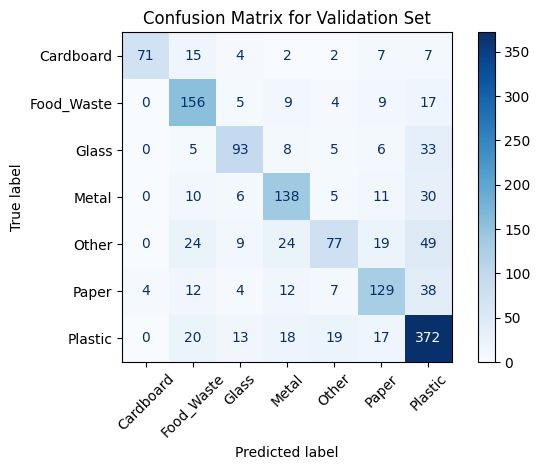

In [47]:
# Evaluate on the test set; display suitable metrics

# Normalize X_val for evaluation
X_val_normalized = X_val / 255.0

# Evaluate the model on the validation set
y_pred = model.predict(X_val_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Classification Report for validation set
print("Classification Report for Validation Set:")
print(classification_report(y_true_classes, y_pred_classes, target_names=unique_labels))

# Confusion Matrix for validation set
cm = confusion_matrix(y_true_classes, y_pred_classes, labels=np.arange(num_classes))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix for Validation Set")
plt.tight_layout()
plt.show()

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images




In [ ]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

In [ ]:
# Calculate accuracy
accu_score = accuracy_score(y_true_classes, y_pred_classes)
# Calculate precision, recall, and F1 score
precision_score = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall_score = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1_score = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"Accuracy: {accu_score:.4f}")
print(f"Precision: {precision_score:.4f}")
print(f"Recall: {recall_score:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Accuracy: 0.6793
Precision: 0.6844
Recall: 0.6793
F1 Score: 0.6726


## Findings about the data

#### Dataset Composition:
 - The dataset consits of images from 7 different categories, namely `Cardboard`, `Food_Waste`, `Glass`, `Metal`, `Paper`,   `Plastic` and `Other`.
 - Each class is represented by a folder containing images of Objects belonging to each category.

### Class Distribution:
 - The dataset has an imbalanced distribution of images across the classes as observed from the bar plot of class distribution.
 - `Plastic` has siginificantly more images(2295) than other categories, `Cardboard` has very low images(540).
 - This might affect model performance.

### Image Characterristics:
 - Images in data set are prest in `.png` format.
 - Resize operation was performed to standardize all images to 128x128 pixels size.

### Label Encoding:
 - Lables were extracted from folder names and encoded into numerical values.
 - One-hot encoding was applied to prepare the labels for model traning.

### Data Splitting:
 - Dataset was split into training & validation sets using 80:20, ensuring the stratification to maintain class distribution in both sets.

### Potential Issues:
 - Dataset contains class imbalance, which may require techniques like data augumentation or class weighting to improve model performance.
 - Some images have overlapping feature between classes, making classification more chaleenging.


## Report model training results

#### Model Architecture:
 - Model consists of 3 convolutional layes with ReLU activation, followed by batch normalization and max-pooling layers.
 - Dropout layers were added to prevent overfitting.
 - Fully connected layers were used for classification, with final layer using a softmax activation for multi-class classification.

 #### Training Process:
 - Model was trained using ADAM Optimizer and Categorical Cross-Entropy Loss.
 - Early stopping, model checkpointing and lerning rate reduction callbacks were used for optimization and preventing overfitting.

 #### Performace Metics:
 - **Accuracy:** Model achieved an accuracy of approx. 68% on validation set.
 - **Precision:** Precision scroe is ~68%.
 - **Recall:** Recall Score is ~68%.
 - **F1 Score:** F1 Score is ~67%.

 #### Confusion Matrix:
 - Confusion matrix revealed that certain class, such as `Plastic` and `Food_Waste`, are classified more accurately that others due to class imbalance.

## Conclusion

1. **Data-related Improvements**
   - Implement data augmentation to address class imbalance
   - Collect more samples for underrepresented classes (especially Cardboard)
   - Include more diverse images within each category

2. **Model Enhancements**
   - Experiment with deeper architectures or pre-trained models
   - Implement class weights to handle imbalanced data
   - Try different optimization strategies and hyperparameters

3. **Practical Applications**
   - Could be integrated into automated waste sorting systems
   - Potential for mobile applications for consumer waste sorting
   - Useful for recycling facilities and waste management education

This demonstrates the potential of CNN-based approaches for waste segregation while highlighting areas for future improvement in both data collection and model architecture.

## References Used:
1. Upgrad's Content & Started Notebook
2. [Image Preprocessing in TensorFlow](https://www.tensorflow.org/tutorials/load_data/images)
3. [Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data)
4. [Understanding One-Hot Encoding](https://towardsdatascience.com/understanding-one-hot-encoding-and-its-importance-in-machine-learning-cf8fb0ab73b4)
5. [Building a CNN in Keras](https://www.tensorflow.org/tutorials/images/cnn)
6. [Evaluating Classification Models](https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/)
